# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import os
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

file_to_output = os.path.join("../output_data/cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
 # Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

citydf = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed =[]

units = "metric"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


for city in cities:
# Build query URL and json
        
        query = query_url + city
        response = requests.get(query)
        response_json = response.json()        
        
        try:
        # append the lists of data and continue with the next item in `text`
            cloudiness.append(response_json["clouds"]["all"])
            country.append(response_json["sys"]["country"])
            date.append(response_json["dt"])
            humidity.append(response_json["main"]["humidity"])            
            lat.append(response_json["coord"]["lat"])
            lng.append(response_json["coord"]["lon"])
            max_temp.append(response_json["main"]["temp_max"])
            wind_speed.append(response_json["wind"]["speed"])
            citydf.append(city)
            print(f"Processing Record: {city}")
        # No JSON object could be decoded - skip this item
        except:
            print(f"Not found")
            pass

Not found
Processing Record: albany
Processing Record: upernavik
Processing Record: iracoubo
Processing Record: jamestown
Processing Record: saint-francois
Processing Record: eston
Not found
Processing Record: ushuaia
Processing Record: bhuj
Processing Record: esperance
Processing Record: hobart
Processing Record: rikitea
Processing Record: cape town
Processing Record: muborak
Processing Record: eirunepe
Processing Record: belaya gora
Processing Record: khatanga
Processing Record: sobolevo
Processing Record: punta arenas
Processing Record: mayo
Processing Record: dikson
Processing Record: uribia
Processing Record: tecoanapa
Processing Record: juneau
Processing Record: dubbo
Processing Record: hoquiam
Processing Record: polunochnoye
Processing Record: kaeo
Processing Record: half moon bay
Processing Record: riyadh
Processing Record: birjand
Processing Record: puerto ayora
Processing Record: chapais
Processing Record: guerrero negro
Processing Record: saint-philippe
Processing Record: bl

Processing Record: alamosa
Processing Record: salalah
Not found
Processing Record: tombouctou
Processing Record: biu
Processing Record: teahupoo
Processing Record: murgab
Processing Record: cururupu
Processing Record: tricase
Not found
Processing Record: kahului
Processing Record: radhanpur
Processing Record: cabo san lucas
Processing Record: lekoni
Processing Record: haicheng
Processing Record: nhulunbuy
Processing Record: ribeira grande
Processing Record: madimba
Processing Record: abu dhabi
Processing Record: bajil
Processing Record: ust-kuyga
Processing Record: sembe
Processing Record: tezu
Processing Record: chukhloma
Processing Record: shanhetun
Processing Record: hazleton
Processing Record: ponta do sol
Processing Record: los llanos de aridane
Processing Record: tiksi
Processing Record: balingasay
Processing Record: lomza
Processing Record: palmer
Processing Record: oda
Processing Record: veraval
Processing Record: inuvik
Not found
Processing Record: guaymas
Processing Record: g

Processing Record: bording


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create data summary
city_data_summary = pd.DataFrame({
    'City': citydf,
    'Cloudiness': cloudiness,
    'Country': country,
    'Date': date,
    'Humidity': humidity,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Wind Speed': wind_speed,})

pd.set_option('display.max_rows', city_data_summary.shape[0]+1)

print(city_data_summary)

                          City  Cloudiness Country        Date  Humidity  \
0                       albany          74      US  1595548816        75   
1                    upernavik          69      GL  1595548895        77   
2                     iracoubo          90      GF  1595548895        84   
3                    jamestown          90      US  1595548895        73   
4               saint-francois         100      FR  1595548895        68   
5                        eston          75      CA  1595548895        65   
6                      ushuaia          40      AR  1595548815        85   
7                         bhuj         100      IN  1595548896        81   
8                    esperance          75      AU  1595548896        93   
9                       hobart          75      AU  1595548786        75   
10                     rikitea           0      PF  1595548896        61   
11                   cape town           0      ZA  1595548896       100   
12          

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

Above100 = city_data_summary[city_data_summary["Humidity"] > 100]

print(Above100)

In [9]:
# check for humidity over 100 and print
Above100 = city_data_summary[city_data_summary["Humidity"] > 100]

print(Above100)

Empty DataFrame
Columns: [City, Cloudiness, Country, Date, Humidity, Lat, Lng, Max Temp, Wind Speed]
Index: []


In [5]:
# describe data
city_data_summary.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,564.000000,5.640000e+02,564.000000,564.000000,564.000000,564.000000,564.000000
mean,50.647163,1.595549e+09,71.492908,21.854220,11.621862,20.367057,3.582571
std,37.497396,6.398956e+01,18.737742,33.236664,90.568896,7.622150,2.328800
min,0.000000,1.595548e+09,1.000000,-54.800000,-179.170000,0.000000,0.120000
25%,10.000000,1.595549e+09,62.000000,-5.540000,-68.517500,15.000000,1.885000
50%,55.500000,1.595549e+09,74.000000,27.950000,14.430000,21.720000,3.095000
75%,88.000000,1.595549e+09,85.000000,49.262500,86.627500,26.035000,4.842500
max,100.000000,1.595549e+09,100.000000,78.220000,179.320000,36.940000,13.440000


In [6]:
#  Get the indices of cities that have humidity over 100%.
Above100 = city_data_summary[city_data_summary["Humidity"] > 100]

print(Above100)

Empty DataFrame
Columns: [City, Cloudiness, Country, Date, Humidity, Lat, Lng, Max Temp, Wind Speed]
Index: []


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data_df = city_data_summary[city_data_summary.Humidity < 84]

clean_city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,albany,74,US,1595548816,75,42.60,-73.97,25.00,2.67
1,upernavik,69,GL,1595548895,77,72.79,-56.15,7.74,4.81
3,jamestown,90,US,1595548895,73,42.10,-79.24,25.00,3.10
4,saint-francois,100,FR,1595548895,68,46.42,3.91,18.89,1.50
5,eston,75,CA,1595548895,65,51.15,-108.75,27.00,6.20


In [8]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
pd.set_option('display.max_rows', clean_city_data_df.shape[0]+1)
clean_city_data_df.to_csv(index=False)


clean_city_data_df.to_csv(output_data_file, index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

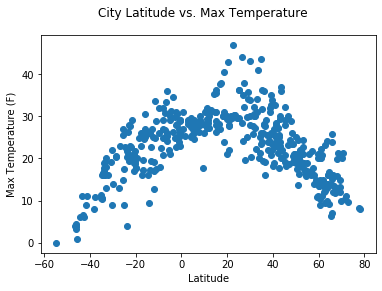

In [18]:
# create an x axis of weight and a y axis of latitude and temperature
x_values = clean_city_data_df['Lat']
y_values = clean_city_data_df['Max Temp']

# plot the values on a scatter plot with labels
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.suptitle("City Latitude vs. Max Temperature")

plt.show()

## Latitude vs. Humidity Plot

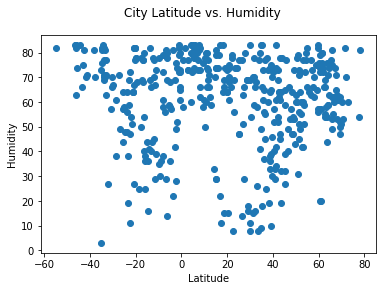

In [19]:
# create an x axis of weight and a y axis of latitude and humidity
x_values = clean_city_data_df['Lat']
y_values = clean_city_data_df['Humidity']

# plot the values on a scatter plot with labels
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.suptitle("City Latitude vs. Humidity")

plt.show()

## Latitude vs. Cloudiness Plot

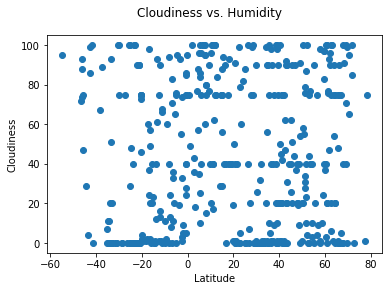

In [20]:
# create an x axis of weight and a y axis of latitude and cloudiness
x_values = clean_city_data_df['Lat']
y_values = clean_city_data_df['Cloudiness']

# plot the values on a scatter plot with labels
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.suptitle("Cloudiness vs. Humidity")

plt.show()

## Latitude vs. Wind Speed Plot

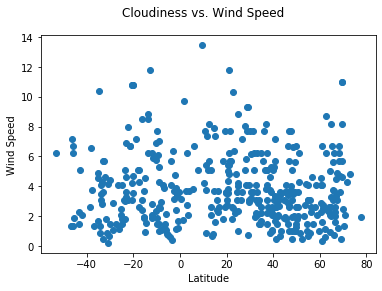

In [10]:
# create an x axis of weight and a y axis of latitude and wind speed
x_values = clean_city_data_df['Lat']
y_values = clean_city_data_df['Wind Speed']

# plot the values on a scatter plot with labels
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.suptitle("Cloudiness vs. Wind Speed")

plt.show()

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots

In [12]:
# Create Northern and Southern Hemisphere DataFrames

northern_hem = clean_city_data_df[clean_city_data_df["Lng"] > 0]
southern_hem = clean_city_data_df[clean_city_data_df["Lng"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.0333147931629361


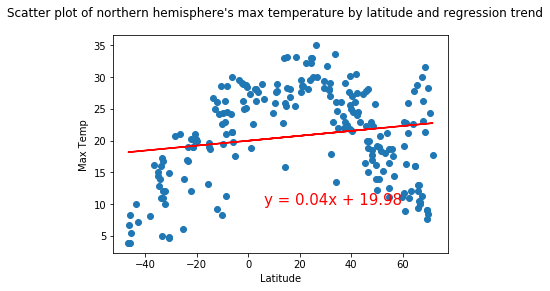

In [13]:
# create x and y of hemisphere
x_values = northern_hem['Lat']
y_values = northern_hem['Max Temp']

# create the lines for the scatter
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot the scatter plot and the regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.suptitle("Scatter plot of northern hemisphere's max temperature by latitude and regression trend")

# find the r squared volume and print
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.025958221186136474


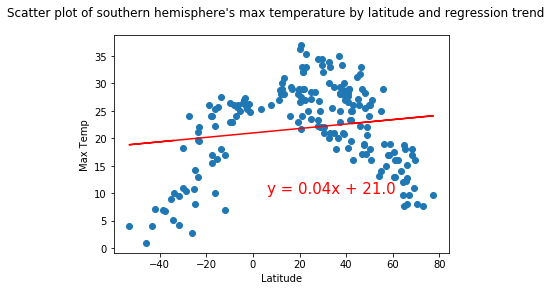

In [14]:
# create x and y of hemisphere
x_values = southern_hem['Lat']
y_values = southern_hem['Max Temp']

# create the lines for the scatter
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot the scatter plot and the regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.suptitle("Scatter plot of southern hemisphere's max temperature by latitude and regression trend")
# find the r squared volume and print
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.006526101493629339


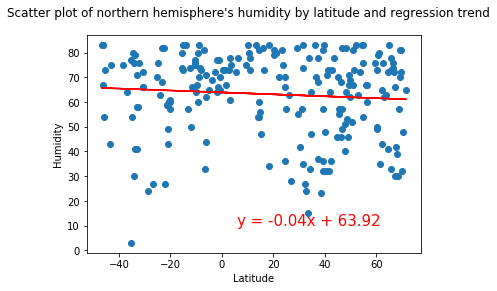

In [16]:
# create x and y of hemisphere
x_values = northern_hem['Lat']
y_values = northern_hem['Humidity']

# create the lines for the scatter
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot the scatter plot and the regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.suptitle("Scatter plot of northern hemisphere's humidity by latitude and regression trend")
# find the r squared volume and print
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04518813791007048


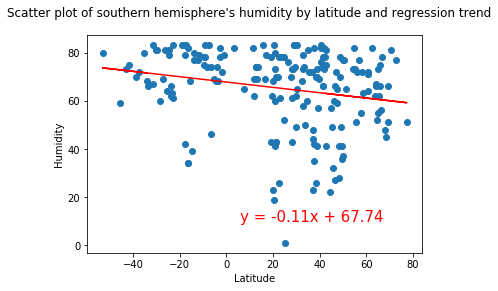

In [17]:
# create x and y of hemisphere
x_values = southern_hem['Lat']
y_values = southern_hem['Humidity']

# create the lines for the scatter
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot the scatter plot and the regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.suptitle("Scatter plot of southern hemisphere's humidity by latitude and regression trend")
# find the r squared volume and print
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.005476065810138154


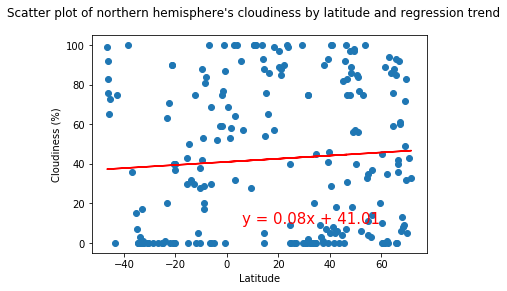

In [18]:
# create x and y of hemisphere
x_values = northern_hem['Lat']
y_values = northern_hem['Cloudiness']

# create the lines for the scatter
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot the scatter plot and the regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.suptitle("Scatter plot of northern hemisphere's cloudiness by latitude and regression trend")
# find the r squared volume and print
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.008865930909261507


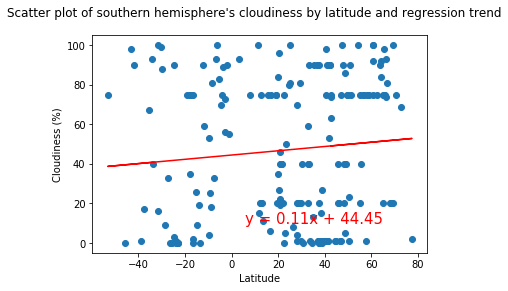

In [19]:
# create x and y of hemisphere
x_values = southern_hem['Lat']
y_values = southern_hem['Cloudiness']

# create the lines for the scatter
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot the scatter plot and the regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.suptitle("Scatter plot of southern hemisphere's cloudiness by latitude and regression trend")
# find the r squared volume and print
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.037848252125235925


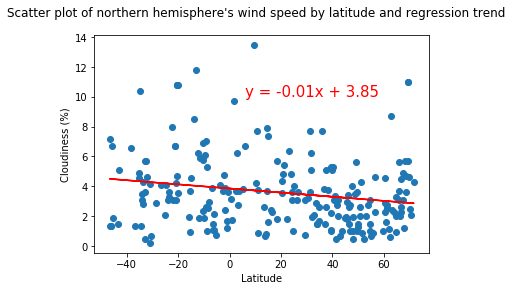

In [20]:
# create x and y of hemisphere
x_values = northern_hem['Lat']
y_values = northern_hem['Wind Speed']

# create the lines for the scatter
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot the scatter plot and the regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.suptitle("Scatter plot of northern hemisphere's wind speed by latitude and regression trend")
# find the r squared volume and print
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01131321975073675


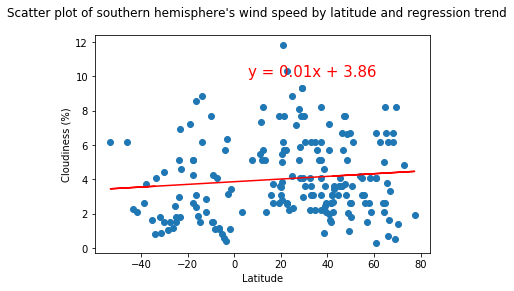

In [21]:
# create x and y of hemisphere
x_values = southern_hem['Lat']
y_values = southern_hem['Wind Speed']

# create the lines for the scatter
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot the scatter plot and the regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.suptitle("Scatter plot of southern hemisphere's wind speed by latitude and regression trend")
# find the r squared volume and print
print(f"The r-squared is: {rvalue**2}")
plt.show()